In [6]:
import numpy as np
from array import array
import os
import sys
import ROOT
from scipy.spatial import distance
from scipy.stats import chi2
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
from fastSimulation import *

In [7]:

folder="${fastMCKalmanOptTesting}/data/testTPCVSGarlite/MC_01smear_Eloss_noMS_Seed_Eloss_noMS_Kalman_Eloss_noMS/"
#folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCSA/"
inputData = folder+"fastParticle.list"
#inputData = folder
ROOT.initTreeFast(inputData)
tree=ROOT.treeFast
treeSeed = ROOT.treeSeed
secondary = ""

Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_noMS_Seed_Eloss_noMS_Kalman_Eloss_noMS/MC_01smear_Eloss_noMS_Seed_Eloss_noMS_Kalman_Eloss_noMS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_noMS_Seed_Eloss_noMS_Kalman_Eloss_noMS/MC_01smear_Eloss_noMS_Seed_Eloss_noMS_Kalman_Eloss_noMS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_noMS_Seed_Eloss_noMS_Kalman_Eloss_noMS/MC_01smear_Eloss_noMS_Seed_Eloss_noMS_Kalman_Eloss_noMS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_noMS_Seed_Eloss_noMS_Kalman_Eloss_noMS/MC_01smear_Eloss_noMS_Seed_Eloss_noMS_Kalman_Eloss_noMS.root


In [8]:
gStyle.SetOptStat(1)
tree.SetMarkerStyle(25)
tree.SetMarkerSize(0.5)
ROOT.setAliases(treeSeed)
treeSeed.SetAlias("p0MC","input.AliExternalTrackParam.fP[0]")
treeSeed.SetAlias("p0Seed","seed.AliExternalTrackParam.fP[0]")
treeSeed.SetAlias("c00Seed","sqrt(seed.AliExternalTrackParam.fC[0])")

treeSeed.SetAlias("p1MC","input.AliExternalTrackParam.fP[1]")
treeSeed.SetAlias("p1Seed","seed.AliExternalTrackParam.fP[1]")
treeSeed.SetAlias("c11Seed","sqrt(seed.AliExternalTrackParam.fC[2])")

treeSeed.SetAlias("p2MC","input.AliExternalTrackParam.fP[2]")
treeSeed.SetAlias("p2Seed","seed.AliExternalTrackParam.fP[2]")
treeSeed.SetAlias("c22Seed","sqrt(seed.AliExternalTrackParam.fC[5])")

treeSeed.SetAlias("p3MC","input.AliExternalTrackParam.fP[3]")
treeSeed.SetAlias("p3Seed","seed.AliExternalTrackParam.fP[3]")
treeSeed.SetAlias("c33Seed","sqrt(seed.AliExternalTrackParam.fC[9])")

treeSeed.SetAlias("p4MC","input.AliExternalTrackParam.fP[4]")
treeSeed.SetAlias("p4Seed","seed.AliExternalTrackParam.fP[4]")
treeSeed.SetAlias("c44Seed","sqrt(seed.AliExternalTrackParam.fC[14])")

treeSeed.SetAlias("c01SeedFull","seed.AliExternalTrackParam.fC[1]")

treeSeed.SetAlias("c02SeedFull","seed.AliExternalTrackParam.fC[3]")
treeSeed.SetAlias("c12SeedFull","seed.AliExternalTrackParam.fC[4]")

treeSeed.SetAlias("c03SeedFull","seed.AliExternalTrackParam.fC[6]")
treeSeed.SetAlias("c13SeedFull","seed.AliExternalTrackParam.fC[7]")
treeSeed.SetAlias("c23SeedFull","seed.AliExternalTrackParam.fC[8]")

treeSeed.SetAlias("c04SeedFull","seed.AliExternalTrackParam.fC[10]")
treeSeed.SetAlias("c14SeedFull","seed.AliExternalTrackParam.fC[11]")
treeSeed.SetAlias("c24SeedFull","seed.AliExternalTrackParam.fC[12]")
treeSeed.SetAlias("c34SeedFull","seed.AliExternalTrackParam.fC[13]")

#treeSeed.SetAlias("pMC","abs((1/cos(atan(input.AliExternalTrackParam.fP[3])))/input.AliExternalTrackParam.fP[4])")
treeSeed.SetAlias("pMC","abs((1/cos(atan(input.AliExternalTrackParam.fP[3])))/input.AliExternalTrackParam.fP[4])")
treeSeed.SetAlias("pSeed","abs((1/cos(atan(seed.AliExternalTrackParam.fP[3])))/seed.AliExternalTrackParam.fP[4])")


treeSeed.SetAlias("Unit0MC","(p0Seed-p0MC)/c00Seed")
treeSeed.SetAlias("Unit1MC","(p1Seed-p1MC)/c11Seed")
treeSeed.SetAlias("Unit2MC","(p2Seed-p2MC)/c22Seed")
treeSeed.SetAlias("Unit3MC","(p3Seed-p3MC)/c33Seed")
treeSeed.SetAlias("Unit4MC","(p4Seed-p4MC)/c44Seed")




True

 FCN=66.1802 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=4.28031e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.16638e+02   3.95867e+00   1.27144e-02  -8.76884e-07
   2  Mean         2.15647e-03   1.01137e-02   4.04580e-05  -1.30442e-04
   3  Sigma        1.00224e+00   7.55516e-03   8.05220e-06   2.66817e-03
 FCN=115.535 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=5.9964e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.18301e+02   3.90501e+00   1.68763e-02  -1.41068e-05
   2  Mean        -5.38960e-03   9.99998e-03   5.26775e-05  -8.32678e-03
   3  Sigma        9.91337e-01   6

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h0
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_noMS_Seed_Eloss_noMS_Kalman_Eloss_noMS/Unit_p0_.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h1
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_noMS_Seed_Eloss_noMS_Kalman_Eloss_noMS/Unit_p1_.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h2
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_noMS_Seed_Eloss_noMS_Kalman_Eloss_noMS/Unit_p2_.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h3
Info in <TCanvas::Print>: png fil

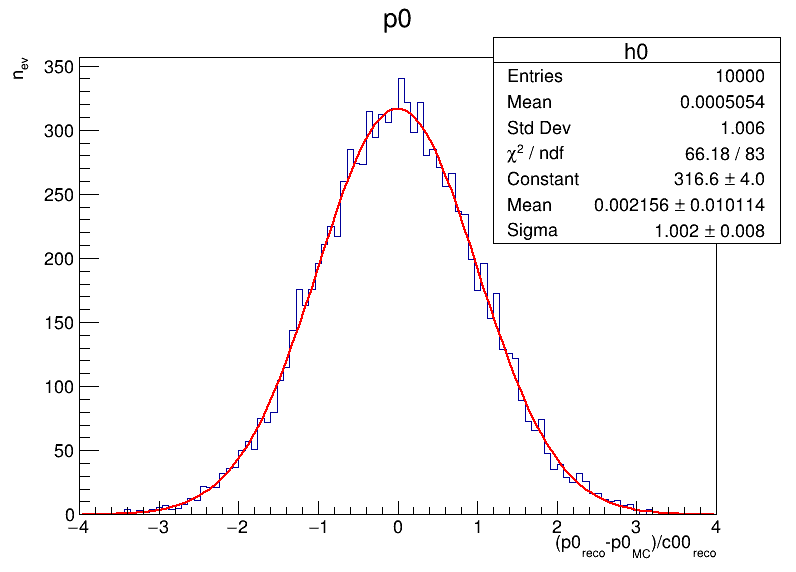

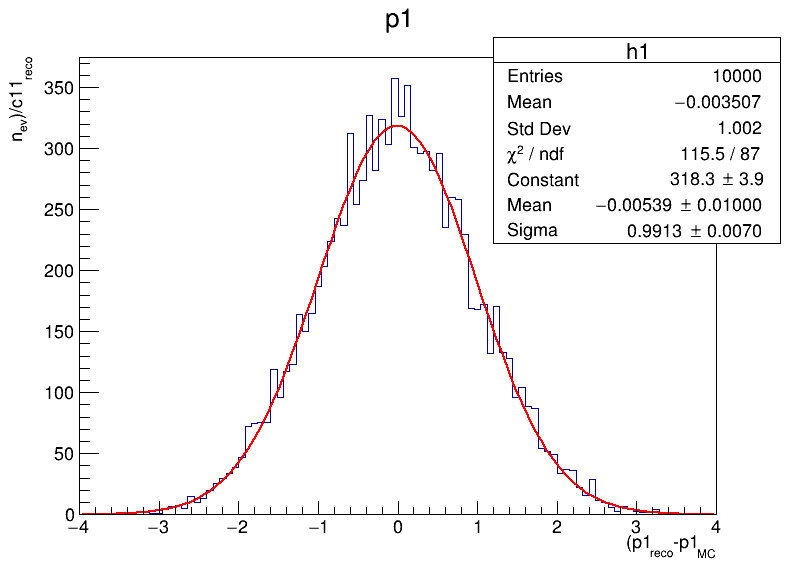

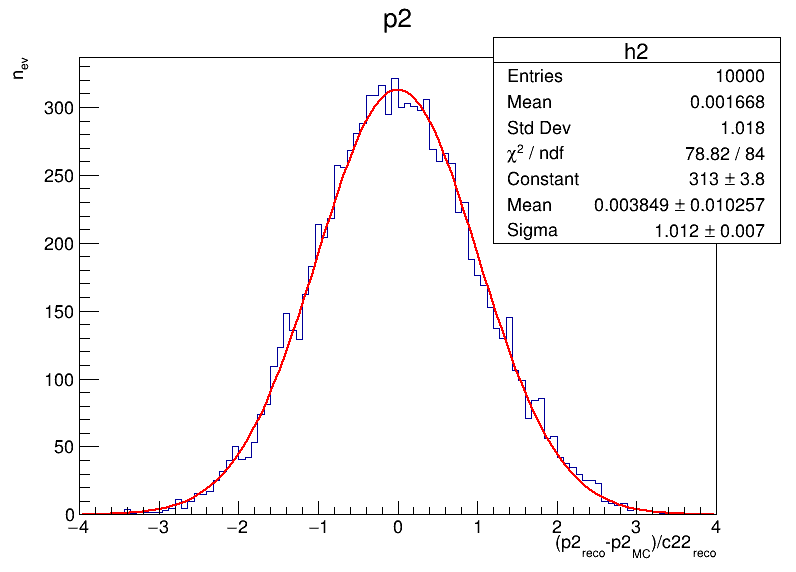

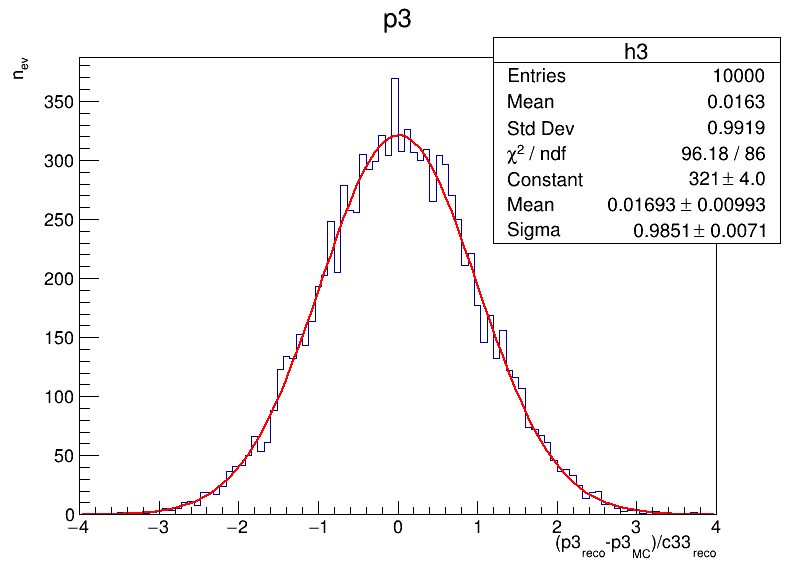

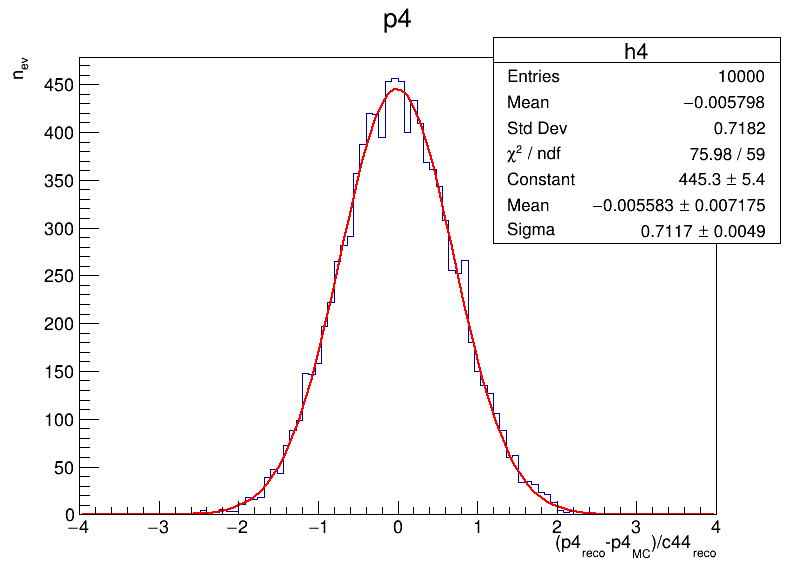

In [9]:
gStyle.SetOptStat(1)
gStyle.SetOptFit(1)

ch0 = ROOT.TCanvas("h0","h0",800,600)
#treeSeed.Draw("(p0Seed-p0MC)>>h0(100,-0.00005,0.00005)")
#treeSeed.Draw("(p0Seed-p0MC)>>h0")treeSeed.Draw("Unit2MC>>h2(100,-4,4)")
treeSeed.Draw("Unit0MC>>h0(100,-4,4)",secondary)
histo0 = ROOT.gDirectory.Get("h0")
histo0.SetTitle("p0;(p0_{reco}-p0_{MC})/c00_{reco};n_{ev}")
histo0.Fit("gaus")
ch0.Draw()
save=folder+"Unit_p0_"+secondary+".png"
ch0.Print(save)

ch1 = ROOT.TCanvas("h1","h1",800,600)
treeSeed.Draw("Unit1MC>>h1(100,-4,4)",secondary)
#treeSeed.Draw("(p1Seed-p1MC)>>h1(100,-0.00005,0.00005)")
histo1 = ROOT.gDirectory.Get("h1")
histo1.SetTitle("p1;(p1_{reco}-p1_{MC};n_{ev})/c11_{reco}")
histo1.Fit("gaus")
ch1.Draw()
save=folder+"Unit_p1_"+secondary+".png"
ch1.Print(save)

ch2 = ROOT.TCanvas("h2","h2",800,600)
treeSeed.Draw("Unit2MC>>h2(100,-4,4)",secondary)
histo2 = ROOT.gDirectory.Get("h2")
histo2.SetTitle("p2;(p2_{reco}-p2_{MC})/c22_{reco};n_{ev}")
histo2.Fit("gaus")
ch2.Draw()
save=folder+"Unit_p2_"+secondary+".png"
ch2.Print(save)

ch3 = ROOT.TCanvas("h3","h3",800,600)
treeSeed.Draw("Unit3MC>>h3(100,-4,4)",secondary)
histo3 = ROOT.gDirectory.Get("h3")
histo3.SetTitle("p3;(p3_{reco}-p3_{MC})/c33_{reco};n_{ev}")
histo3.Fit("gaus")
ch3.Draw()
save=folder+"Unit_p3_"+secondary+".png"
ch3.Print(save)

ch4 = ROOT.TCanvas("h4","h4",800,600)
treeSeed.Draw("Unit4MC>>h4(100,-4,4)",secondary)
histo4 = ROOT.gDirectory.Get("h4")
histo4.SetTitle("p4;(p4_{reco}-p4_{MC})/c44_{reco};n_{ev}")
histo4.Fit("gaus")
ch4.Draw()
save=folder+"Unit_p4_"+secondary+".png"
ch4.Print(save)

 FCN=108.921 FROM MIGRAD    STATUS=CONVERGED      12 CALLS          13 TOTAL
                     EDM=1.33654e-17    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.50543e-01   7.69187e-02   3.93770e-04  -6.72162e-08
 FCN=117.508 FROM MIGRAD    STATUS=CONVERGED      12 CALLS          13 TOTAL
                     EDM=3.57196e-16    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.41223e-01   1.64830e-02   8.76153e-05  -1.62156e-06
 FCN=359.928 FROM MIGRAD    STATUS=CONVERGED      12 CALLS          13 TOTAL
                     EDM=1.25213e-16    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h03
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_noMS_Seed_Eloss_noMS_Kalman_Eloss_noMS/Unit_p03_.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h13
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_noMS_Seed_Eloss_noMS_Kalman_Eloss_noMS/Unit_p13_.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h23
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_noMS_Seed_Eloss_noMS_Kalman_Eloss_noMS/Unit_p23_.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h02
Info in <TCanvas::Print>: 

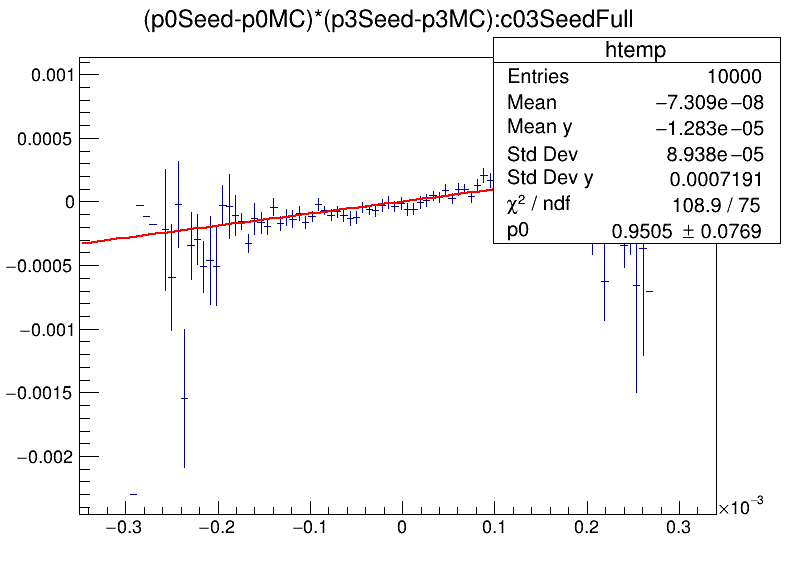

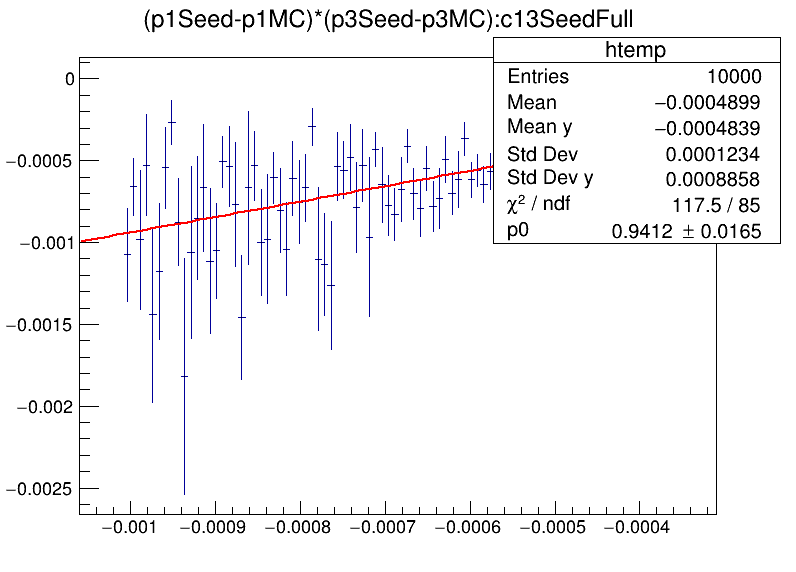

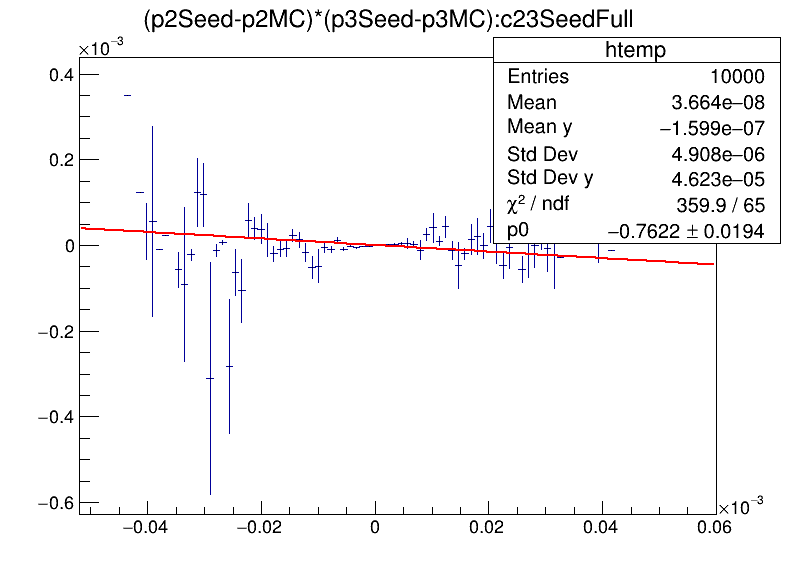

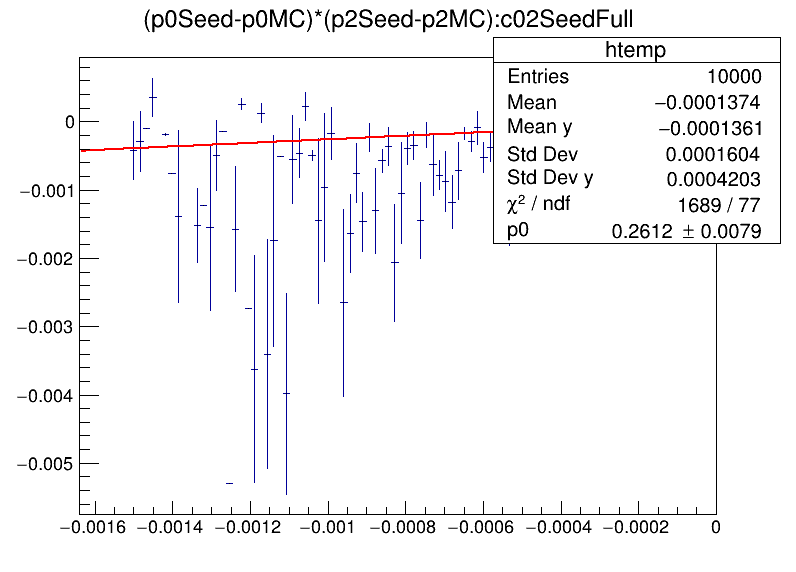

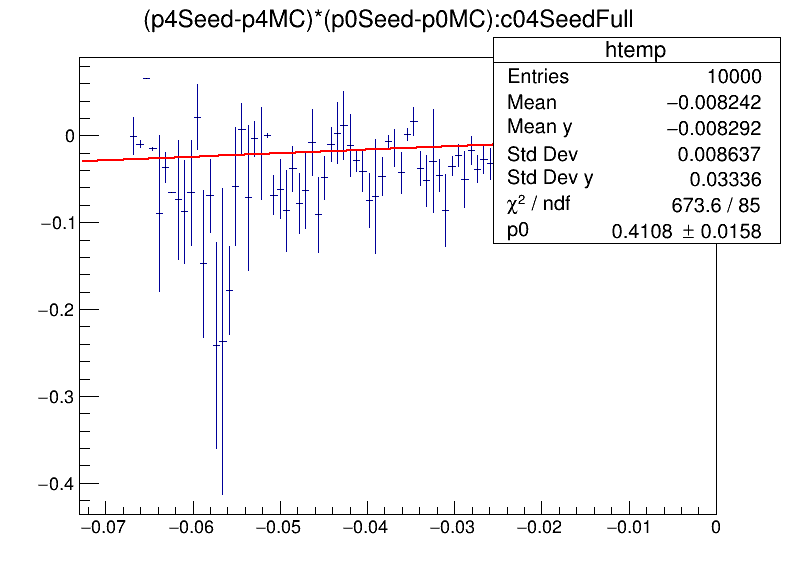

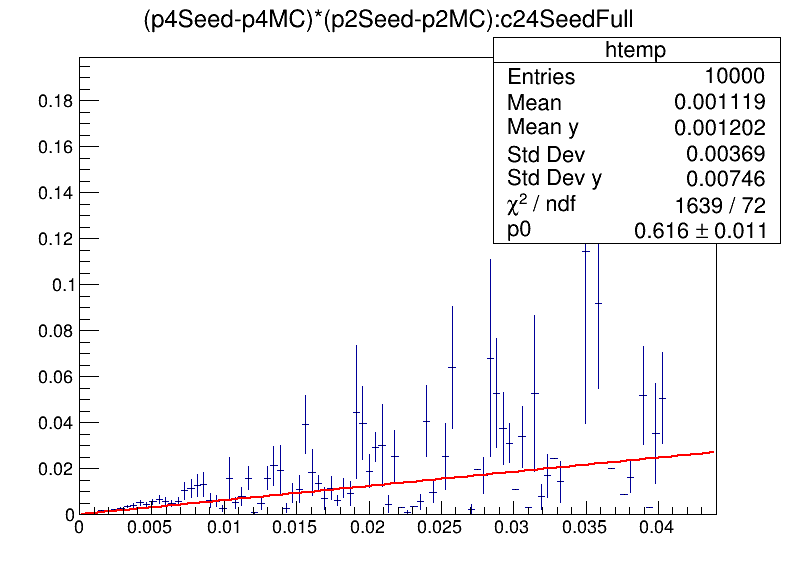

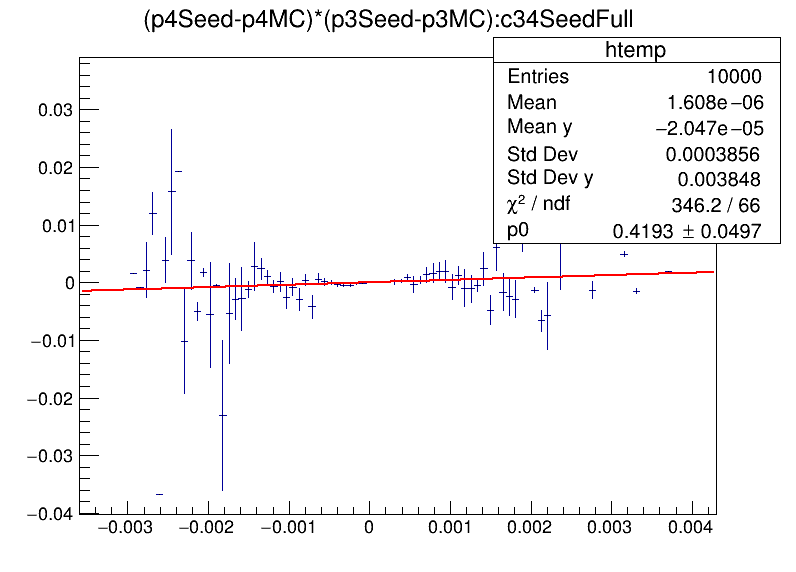

In [10]:
f03 = ROOT.TF1("f03", "[0]*x")

ch03 = ROOT.TCanvas("h03","h03",800,600)
treeSeed.Draw("(p0Seed-p0MC)*(p3Seed-p3MC):c03SeedFull",secondary, "prof")
treeSeed.GetHistogram().Fit("f03")
ch03.Draw()
save=folder+"Unit_p03_"+secondary+".png"
ch03.Print(save)

f13 = ROOT.TF1("f13", "[0]*x")

ch13 = ROOT.TCanvas("h13","h13",800,600)
treeSeed.Draw("(p1Seed-p1MC)*(p3Seed-p3MC):c13SeedFull",secondary, "prof")
treeSeed.GetHistogram().Fit("f13")
ch13.Draw()
save=folder+"Unit_p13_"+secondary+".png"
ch13.Print(save)

f23 = ROOT.TF1("f23", "[0]*x")

ch23 = ROOT.TCanvas("h23","h23",800,600)
treeSeed.Draw("(p2Seed-p2MC)*(p3Seed-p3MC):c23SeedFull",secondary, "prof")
treeSeed.GetHistogram().Fit("f23")
ch23.Draw()
save=folder+"Unit_p23_"+secondary+".png"
ch23.Print(save)


f02 = ROOT.TF1("f02", "[0]*x")

ch02 = ROOT.TCanvas("h02","h02",800,600)
treeSeed.Draw("(p0Seed-p0MC)*(p2Seed-p2MC):c02SeedFull", secondary, "prof")
treeSeed.GetHistogram().Fit("f02")
ch02.Draw()
save=folder+"Unit_p02_"+secondary+".png"
ch02.Print(save)


f04 = ROOT.TF1("f04", "[0]*x")

ch04 = ROOT.TCanvas("h04","h04",800,600)
treeSeed.Draw("(p4Seed-p4MC)*(p0Seed-p0MC):c04SeedFull", secondary, "prof")
treeSeed.GetHistogram().Fit("f04")
ch04.Draw()
save=folder+"Unit_p04_"+secondary+".png"
ch04.Print(save)

f24 = ROOT.TF1("f24", "[0]*x")

ch24 = ROOT.TCanvas("h24","h24",800,600)
treeSeed.Draw("(p4Seed-p4MC)*(p2Seed-p2MC):c24SeedFull", secondary, "prof")
treeSeed.GetHistogram().Fit("f24")
ch24.Draw()
save=folder+"Unit_p24_"+secondary+".png"
ch24.Print(save)

f34 = ROOT.TF1("f34", "[0]*x")

ch34 = ROOT.TCanvas("h34","h34",800,600)
treeSeed.Draw("(p4Seed-p4MC)*(p3Seed-p3MC):c34SeedFull", secondary, "prof")
treeSeed.GetHistogram().Fit("f34")
ch34.Draw()
save=folder+"Unit_p34_"+secondary+".png"
ch34.Print(save)

